In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")


# Step 2: Create a text generation pipeline using the loaded model and tokenizer
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)


In [2]:
pip install rouge-score

In [4]:
from datasets import load_dataset
dataset = load_dataset("nisaar/Lawyer_GPT_India")

Generating train split:   0%|          | 0/150 [00:00<?, ? examples/s]

In [3]:
pip install datasets

In [5]:

ques=dataset['train']['question']
ans=dataset['train']['answer']


In [6]:
import pandas as pd
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer with all required ROUGE types
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rows = []  # This will hold all rows of data

for i in range(10):  # Assuming ques and ans are defined lists
    question = ques[i]
    actual_answer = ans[i]

    output = generator(question, max_length=200)  # Generate text using the model
    model_output = output[0]['generated_text']

    scores = scorer.score(actual_answer, model_output)  # Calculate ROUGE scores

    # Create a row and append it to the rows list
    row = [
        scores['rouge1'].precision, scores['rouge1'].recall, scores['rouge1'].fmeasure,
        scores['rouge2'].precision, scores['rouge2'].recall, scores['rouge2'].fmeasure,
        scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure
    ]
    rows.append(row)

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows, columns=[
    'ROUGE-1 Precision', 'ROUGE-1 Recall', 'ROUGE-1 F-measure',
    'ROUGE-2 Precision', 'ROUGE-2 Recall', 'ROUGE-2 F-measure',
    'ROUGE-L Precision', 'ROUGE-L Recall', 'ROUGE-L F-measure'
])

# Save the DataFrame to a CSV file
df.to_csv('gpt_2_rouge_scores_100.csv', index=False)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for 

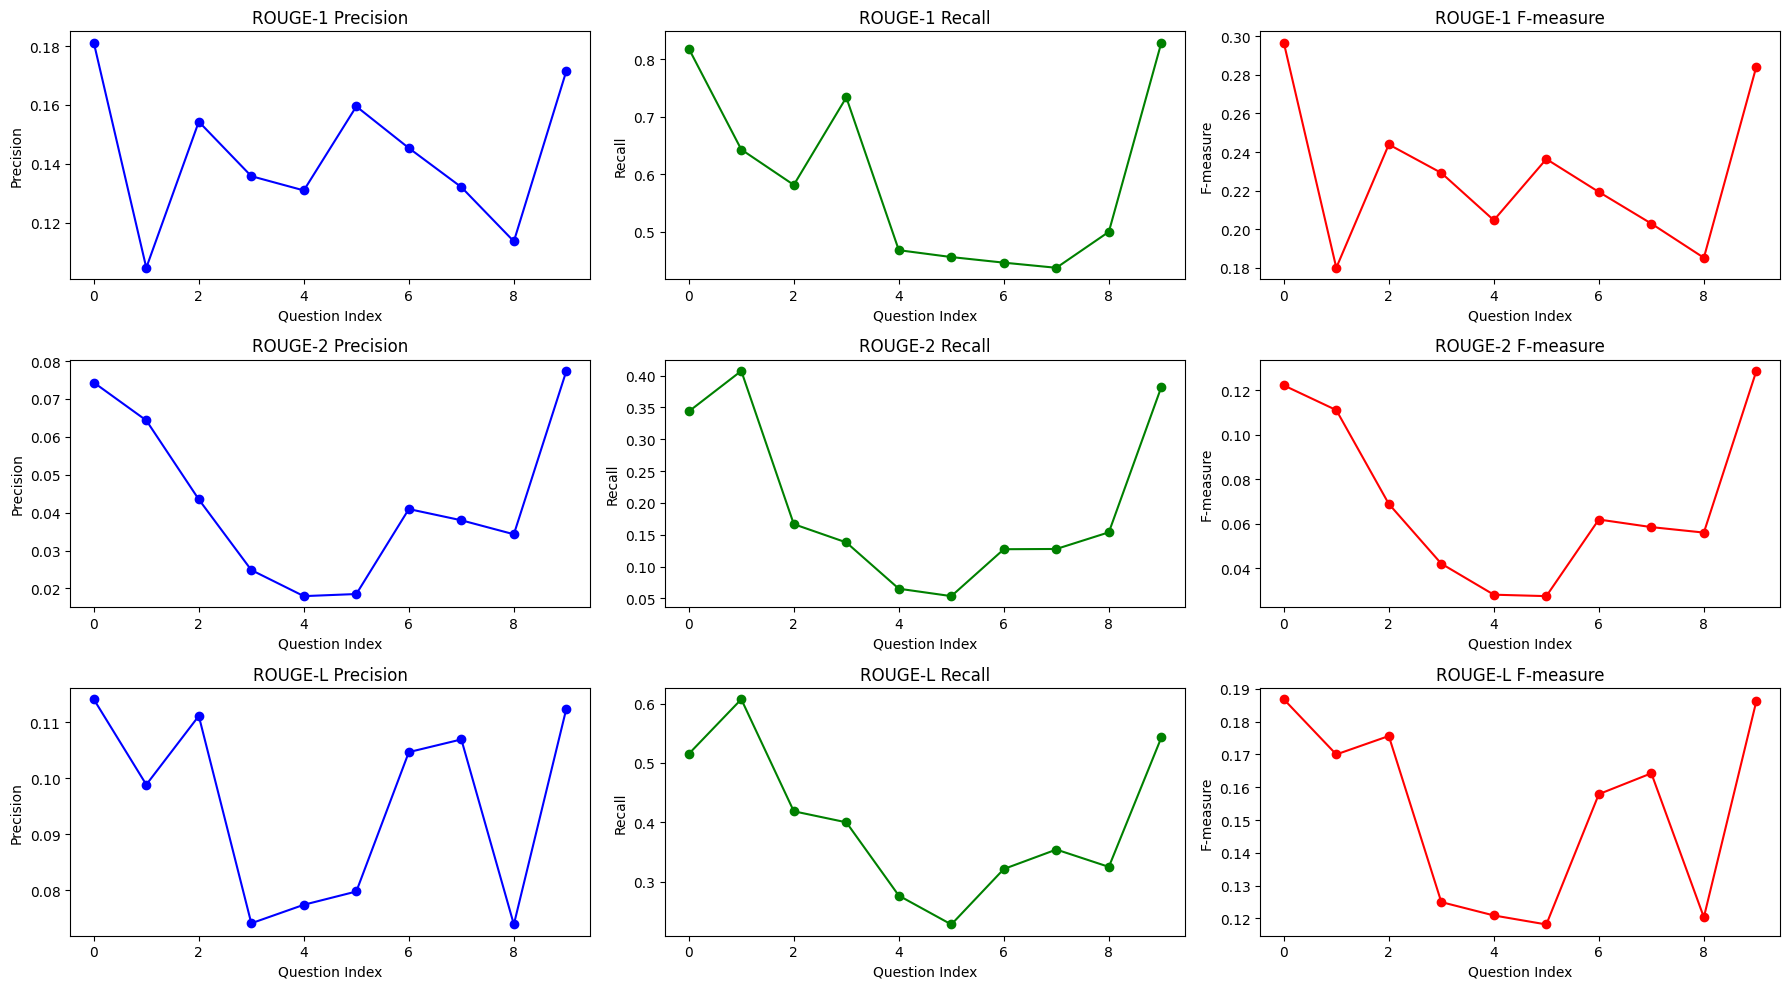

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV files for each model
csv_files = ['gpt_2_rouge_scores_100.csv']

# Loop over each CSV file
for csv_file in csv_files:
    # Load the data from the CSV file
    df = pd.read_csv(csv_file)

    # Extract ROUGE scores for each model
    precisions_rouge1 = df['ROUGE-1 Precision']
    recalls_rouge1 = df['ROUGE-1 Recall']
    fmeasures_rouge1 = df['ROUGE-1 F-measure']

    precisions_rouge2 = df['ROUGE-2 Precision']
    recalls_rouge2 = df['ROUGE-2 Recall']
    fmeasures_rouge2 = df['ROUGE-2 F-measure']

    precisions_rougeL = df['ROUGE-L Precision']
    recalls_rougeL = df['ROUGE-L Recall']
    fmeasures_rougeL = df['ROUGE-L F-measure']

    # Number of questions (or data points)
    num_questions = len(precisions_rouge1)

    # Create subplots
    fig, axs = plt.subplots(3, 3, figsize=(18, 10))  # 3 ROUGE types, 3 metrics each

    # Plot ROUGE-1 metrics
    axs[0, 0].plot(range(num_questions), precisions_rouge1, marker='o', color='blue')
    axs[0, 0].set_title('ROUGE-1 Precision')
    axs[0, 0].set_xlabel('Question Index')
    axs[0, 0].set_ylabel('Precision')

    axs[0, 1].plot(range(num_questions), recalls_rouge1, marker='o', color='green')
    axs[0, 1].set_title('ROUGE-1 Recall')
    axs[0, 1].set_xlabel('Question Index')
    axs[0, 1].set_ylabel('Recall')

    axs[0, 2].plot(range(num_questions), fmeasures_rouge1, marker='o', color='red')
    axs[0, 2].set_title('ROUGE-1 F-measure')
    axs[0, 2].set_xlabel('Question Index')
    axs[0, 2].set_ylabel('F-measure')

    # Plot ROUGE-2 metrics
    axs[1, 0].plot(range(num_questions), precisions_rouge2, marker='o', color='blue')
    axs[1, 0].set_title('ROUGE-2 Precision')
    axs[1, 0].set_xlabel('Question Index')
    axs[1, 0].set_ylabel('Precision')

    axs[1, 1].plot(range(num_questions), recalls_rouge2, marker='o', color='green')
    axs[1, 1].set_title('ROUGE-2 Recall')
    axs[1, 1].set_xlabel('Question Index')
    axs[1, 1].set_ylabel('Recall')

    axs[1, 2].plot(range(num_questions), fmeasures_rouge2, marker='o', color='red')
    axs[1, 2].set_title('ROUGE-2 F-measure')
    axs[1, 2].set_xlabel('Question Index')
    axs[1, 2].set_ylabel('F-measure')

    # Plot ROUGE-L metrics
    axs[2, 0].plot(range(num_questions), precisions_rougeL, marker='o', color='blue')
    axs[2, 0].set_title('ROUGE-L Precision')
    axs[2, 0].set_xlabel('Question Index')
    axs[2, 0].set_ylabel('Precision')

    axs[2, 1].plot(range(num_questions), recalls_rougeL, marker='o', color='green')
    axs[2, 1].set_title('ROUGE-L Recall')
    axs[2, 1].set_xlabel('Question Index')
    axs[2, 1].set_ylabel('Recall')

    axs[2, 2].plot(range(num_questions), fmeasures_rougeL, marker='o', color='red')
    axs[2, 2].set_title('ROUGE-L F-measure')
    axs[2, 2].set_xlabel('Question Index')
    axs[2, 2].set_ylabel('F-measure')

    # Adjust layout
plt.tight_layout()
plt.show()